In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
path = "/content/drug200.csv"
df = pd.read_csv(path)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


In [4]:
missing = df.isnull().sum()
missing

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
df.replace(['M','F'], ['Male', 'Female'], inplace=True)

In [6]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,Female,HIGH,HIGH,25.355,drugY
1,47,Male,LOW,HIGH,13.093,drugC
2,47,Male,LOW,HIGH,10.114,drugC
3,28,Female,NORMAL,HIGH,7.798,drugX
4,61,Female,LOW,HIGH,18.043,drugY


In [7]:
for i in df.columns:
    if i == 'Age' or i == 'Na_to_K':
        continue

    counts = df[i].value_counts()

    print(f"Value counts for column '{i}':")
    print(counts)
    print('-------------------------')

Value counts for column 'Sex':
Sex
Male      104
Female     96
Name: count, dtype: int64
-------------------------
Value counts for column 'BP':
BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64
-------------------------
Value counts for column 'Cholesterol':
Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64
-------------------------
Value counts for column 'Drug':
Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64
-------------------------


#Visualizing

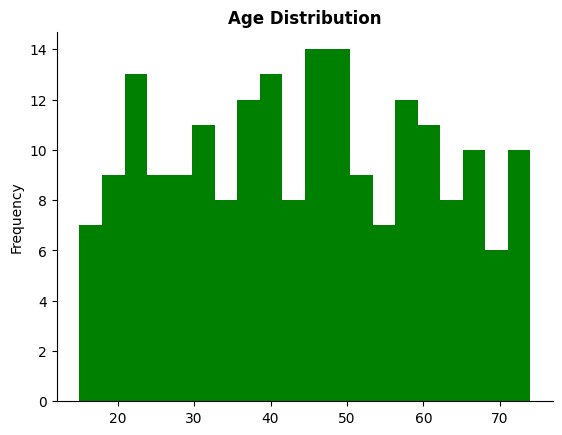

In [8]:
df['Age'].plot(kind='hist', bins=20, color = 'green')
plt.title('Age Distribution', fontweight='bold')
plt.gca().spines[['top', 'right',]].set_visible(False)

Text(0.5, 1.0, 'Gender Distribution')

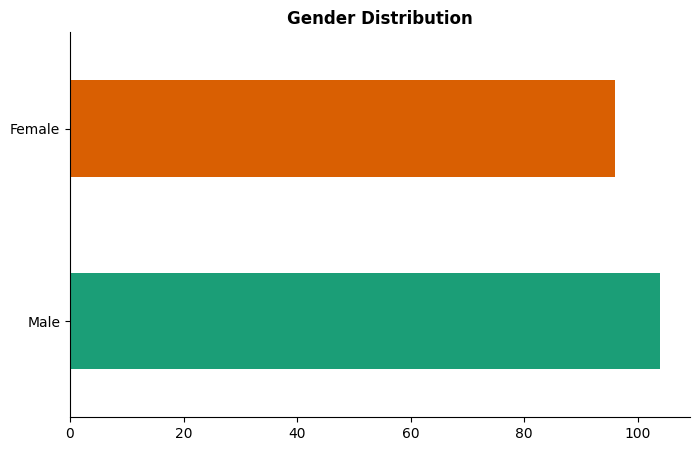

In [9]:
sex_counts = df['Sex'].value_counts()

plt.figure(figsize=(8, 5))
sex_counts.plot(kind ='barh',color= sns.palettes.mpl_palette('Dark2'), ylabel= '')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title('Gender Distribution', fontweight = 'bold')

<ipython-input-10-d2e57abe57da>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df , x = df['Drug'], palette='muted')


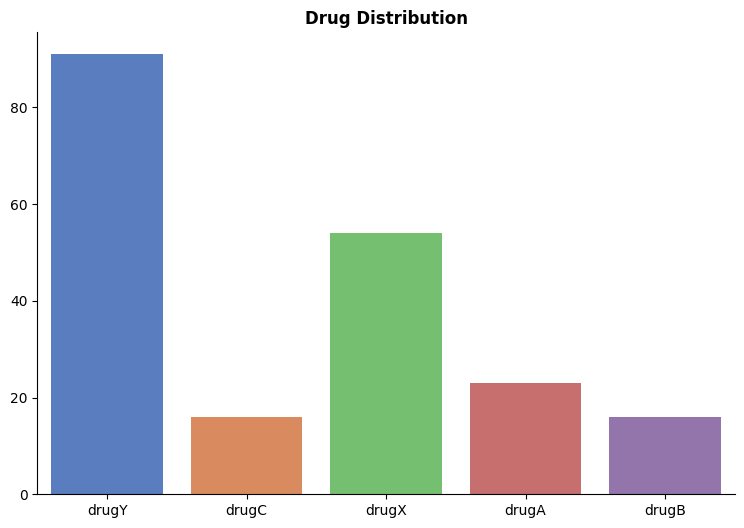

In [10]:
plt.figure(figsize=(9, 6))
plt.title('Drug Distribution', fontweight = 'bold')
sns.countplot(data = df , x = df['Drug'], palette='muted')

plt.gca().spines[['top', 'right',]].set_visible(False)
plt.ylabel('')
plt.xlabel('')
plt.show()

<ipython-input-11-c15f68bf5564>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df , x = df['BP'], palette='pastel')


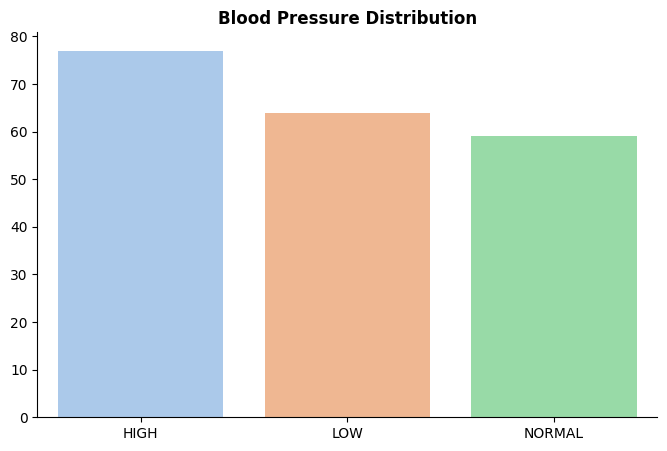

In [11]:
plt.figure(figsize=(8, 5))
plt.title('Blood Pressure Distribution', fontweight = 'bold')
sns.countplot(data = df , x = df['BP'], palette='pastel')

plt.gca().spines[['top', 'right',]].set_visible(False)
plt.ylabel('')
plt.xlabel('')
plt.show()

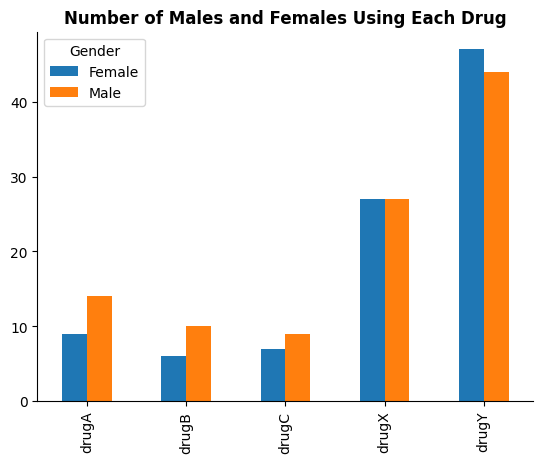

In [12]:
grouped = df.groupby(['Drug', 'Sex']).size().unstack()

grouped.plot(kind='bar', stacked=False)
plt.title('Number of Males and Females Using Each Drug', fontweight = 'bold')
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Gender')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

<ipython-input-13-f3268a38640f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', y='Drug', data=df, palette='Set3')


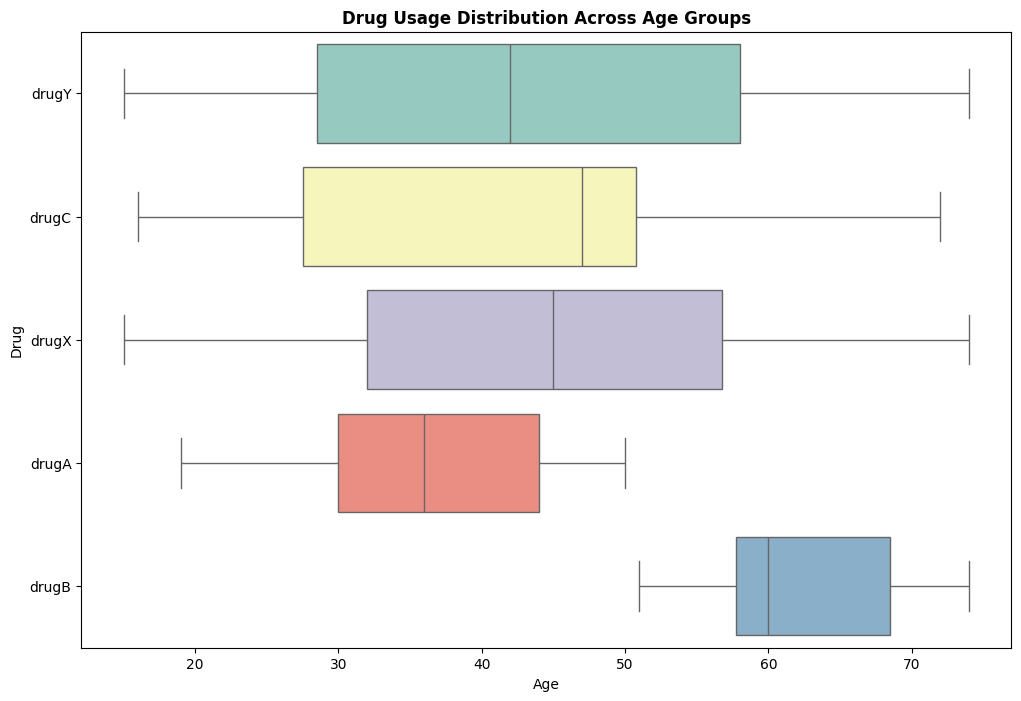

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Age', y='Drug', data=df, palette='Set3')
plt.title('Drug Usage Distribution Across Age Groups', fontweight = 'bold' )
plt.xlabel('Age')
plt.ylabel('Drug')
plt.show()

#Prepare The Data

In [14]:
columns_to_encode = ['BP', 'Sex','Cholesterol']

label_encoder = LabelEncoder()

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

print(df)

     Age  Sex  BP  Cholesterol  Na_to_K   Drug
0     23    0   0            0   25.355  drugY
1     47    1   1            0   13.093  drugC
2     47    1   1            0   10.114  drugC
3     28    0   2            0    7.798  drugX
4     61    0   1            0   18.043  drugY
..   ...  ...  ..          ...      ...    ...
195   56    0   1            0   11.567  drugC
196   16    1   1            0   12.006  drugC
197   52    1   2            0    9.894  drugX
198   23    1   2            1   14.020  drugX
199   40    0   1            1   11.349  drugX

[200 rows x 6 columns]


In [15]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [16]:
x.shape, y.shape


((200, 5), (200,))

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [18]:
print(x_train.shape, y_train.shape)
print('--------------------------')
print(x_test.shape, y_test.shape)

(160, 5) (160,)
--------------------------
(40, 5) (40,)


#Random Forest

In [19]:
RFC = RandomForestClassifier(n_estimators=100, random_state=42, criterion='entropy')
RFC.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [20]:
# Predict on the test set
y_pred = RFC.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [21]:
print('drugA', sum(y_pred == 'drugA'))
print('drugB', sum(y_pred == 'drugB'))
print('drugC', sum(y_pred == 'drugC'))
print('drugX', sum(y_pred == 'drugX'))
print('drugY', sum(y_pred == 'drugY'))

drugA 4
drugB 3
drugC 2
drugX 10
drugY 21


In [22]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

print('--------------------------------------------------------------------------')

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         4
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         2
       drugX       1.00      1.00      1.00        10
       drugY       1.00      1.00      1.00        21

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

--------------------------------------------------------------------------
Confusion Matrix:
[[ 4  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  2  0  0]
 [ 0  0  0 10  0]
 [ 0  0  0  0 21]]


In [23]:
RFC_cv_scores = cross_val_score(RFC, x, y, cv=10)
print("Gradient Boosting Cross-Validation Scores:", RFC_cv_scores)


Gradient Boosting Cross-Validation Scores: [1.   1.   1.   1.   1.   1.   1.   0.95 0.95 1.  ]


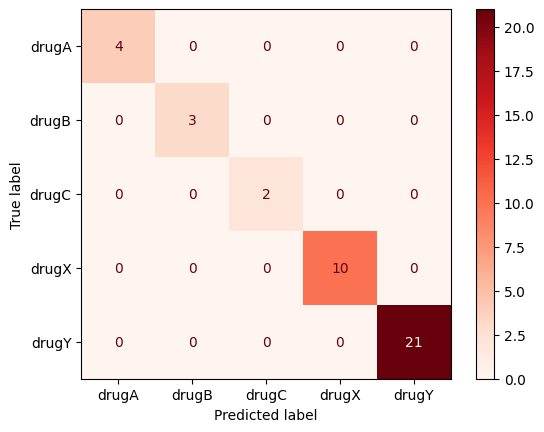

In [24]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels =  RFC.classes_, cmap = 'Reds')
plt.show()

#KNN

In [25]:
KNN = KNeighborsClassifier(n_neighbors=5,weights='distance' )
KNN.fit(x_train,y_train)

# Predict on the test set
y_pred_knn = KNN.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy}')

print('drugA', sum(y_pred == 'drugA'))
print('drugB', sum(y_pred == 'drugB'))
print('drugC', sum(y_pred == 'drugC'))
print('drugX', sum(y_pred == 'drugX'))
print('drugY', sum(y_pred == 'drugY'))

Accuracy: 0.65
drugA 4
drugB 3
drugC 2
drugX 10
drugY 21


In [26]:
print('Classification Report:')
print(classification_report(y_test, y_pred_knn))

print('--------------------------------------------------------------------------')

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_knn))

Classification Report:
              precision    recall  f1-score   support

       drugA       0.33      0.25      0.29         4
       drugB       0.29      0.67      0.40         3
       drugC       0.33      0.50      0.40         2
       drugX       0.50      0.40      0.44        10
       drugY       0.95      0.86      0.90        21

    accuracy                           0.65        40
   macro avg       0.48      0.53      0.49        40
weighted avg       0.69      0.65      0.66        40

--------------------------------------------------------------------------
Confusion Matrix:
[[ 1  0  1  2  0]
 [ 0  2  0  1  0]
 [ 0  0  1  1  0]
 [ 1  3  1  4  1]
 [ 1  2  0  0 18]]


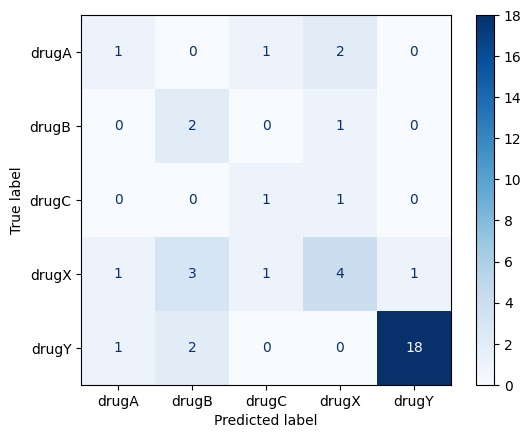

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, labels =  KNN.classes_, cmap = 'Blues')
plt.show()

In [28]:
KNN_cv_scores = cross_val_score(KNN, x, y, cv=10)
print("Gradient Boosting Cross-Validation Scores:", KNN_cv_scores)


Gradient Boosting Cross-Validation Scores: [0.75 0.85 0.8  0.75 0.75 0.75 0.8  0.7  0.6  0.65]


#Decision Tree

In [29]:
DTF = DecisionTreeClassifier()
DTF.fit(x_train,y_train)

# Predict on the test set
y_pred_DTF = DTF.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_DTF)
print(f'Accuracy: {accuracy}')

print('drugA', sum(y_pred == 'drugA'))
print('drugB', sum(y_pred == 'drugB'))
print('drugC', sum(y_pred == 'drugC'))
print('drugX', sum(y_pred == 'drugX'))
print('drugY', sum(y_pred == 'drugY'))

Accuracy: 0.975
drugA 4
drugB 3
drugC 2
drugX 10
drugY 21


In [30]:
print('Classification Report:')
print(classification_report(y_test, y_pred_DTF))

print('--------------------------------------------------------------------------')

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_DTF))

Classification Report:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         4
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         2
       drugX       1.00      0.90      0.95        10
       drugY       0.95      1.00      0.98        21

    accuracy                           0.97        40
   macro avg       0.99      0.98      0.98        40
weighted avg       0.98      0.97      0.97        40

--------------------------------------------------------------------------
Confusion Matrix:
[[ 4  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  2  0  0]
 [ 0  0  0  9  1]
 [ 0  0  0  0 21]]


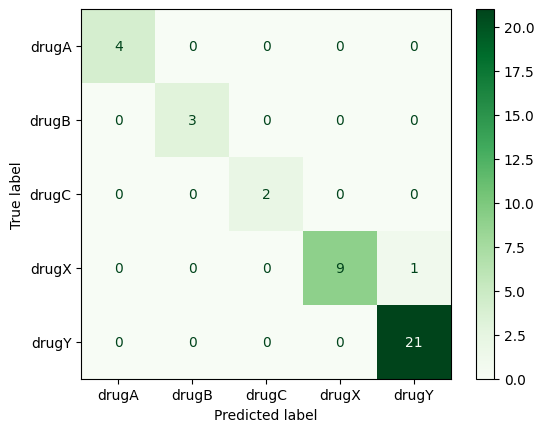

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_DTF, labels =  DTF.classes_, cmap = 'Greens')
plt.show()

In [32]:
DTF_cv_scores = cross_val_score(DTF, x, y, cv=10)
print("Gradient Boosting Cross-Validation Scores:", DTF_cv_scores)


Gradient Boosting Cross-Validation Scores: [1.   1.   1.   1.   1.   1.   1.   0.95 0.95 1.  ]


#SVM

In [33]:
SVM_CLF = SVC(C = 1, kernel = 'linear')
SVM_CLF.fit(x_train, y_train)

# Predict on the test set
y_pred_SVC = DTF.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_SVC)
print(f'Accuracy: {accuracy}')

print('drugA', sum(y_pred == 'drugA'))
print('drugB', sum(y_pred == 'drugB'))
print('drugC', sum(y_pred == 'drugC'))
print('drugX', sum(y_pred == 'drugX'))
print('drugY', sum(y_pred == 'drugY'))

Accuracy: 0.975
drugA 4
drugB 3
drugC 2
drugX 10
drugY 21


In [34]:
print('Classification Report:')
print(classification_report(y_test, y_pred_DTF))

print('--------------------------------------------------------------------------')

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_DTF))

Classification Report:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         4
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         2
       drugX       1.00      0.90      0.95        10
       drugY       0.95      1.00      0.98        21

    accuracy                           0.97        40
   macro avg       0.99      0.98      0.98        40
weighted avg       0.98      0.97      0.97        40

--------------------------------------------------------------------------
Confusion Matrix:
[[ 4  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  2  0  0]
 [ 0  0  0  9  1]
 [ 0  0  0  0 21]]


In [35]:
svm_cv_scores = cross_val_score(SVM_CLF, x, y, cv=10)
print("Gradient Boosting Cross-Validation Scores:", svm_cv_scores)


Gradient Boosting Cross-Validation Scores: [1.   1.   1.   1.   1.   1.   1.   0.95 1.   1.  ]


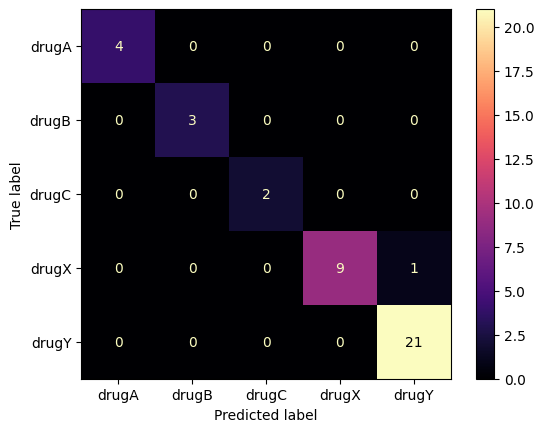

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_DTF, labels =  DTF.classes_, cmap = 'magma')
plt.show()

#Gradient Boosting

In [37]:
GBC = GradientBoostingClassifier(learning_rate = 0.25, n_estimators=50, max_depth=4, random_state=42)
GBC.fit(x_train, y_train)

# Predict on the test set
y_pred_GBC = DTF.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_GBC)
print(f'Accuracy: {accuracy}')

print('drugA', sum(y_pred == 'drugA'))
print('drugB', sum(y_pred == 'drugB'))
print('drugC', sum(y_pred == 'drugC'))
print('drugX', sum(y_pred == 'drugX'))
print('drugY', sum(y_pred == 'drugY'))

Accuracy: 0.975
drugA 4
drugB 3
drugC 2
drugX 10
drugY 21


In [38]:
print('Classification Report:')
print(classification_report(y_test, y_pred_GBC))

print('--------------------------------------------------------------------------')

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_GBC))

Classification Report:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         4
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         2
       drugX       1.00      0.90      0.95        10
       drugY       0.95      1.00      0.98        21

    accuracy                           0.97        40
   macro avg       0.99      0.98      0.98        40
weighted avg       0.98      0.97      0.97        40

--------------------------------------------------------------------------
Confusion Matrix:
[[ 4  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  2  0  0]
 [ 0  0  0  9  1]
 [ 0  0  0  0 21]]


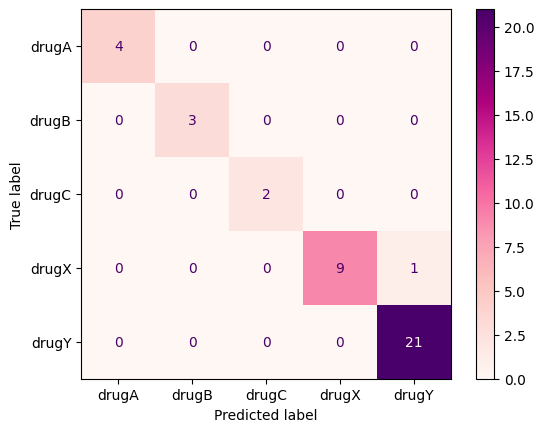

In [39]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_GBC, labels =  GBC.classes_, cmap = 'RdPu')
plt.show()

In [40]:
gb_cv_scores = cross_val_score(GBC, x, y, cv=10)
print("Gradient Boosting Cross-Validation Scores:", gb_cv_scores)


Gradient Boosting Cross-Validation Scores: [0.95 1.   0.95 0.95 1.   1.   1.   0.95 0.9  1.  ]


#Evaluate

In [41]:
Model_Comparison_Table = pd.DataFrame(data = [accuracy_score(y_test, y_pred_DTF),
                                              accuracy_score(y_test, y_pred),
                                              accuracy_score(y_test, y_pred_knn),
                                              accuracy_score(y_test, y_pred_SVC),
                                              accuracy_score(y_test, y_pred_GBC)],
                                      index = ['Decision Tree','Random Forest','KNN','Linear SVM','Gradient Boosting'],
                                      columns = ['Accuracy'])

In [42]:
Model_Comparison_Table['Accuracy'] = Model_Comparison_Table['Accuracy']

Model_Comparison_Table.sort_values(by = ['Accuracy'], ascending = False)

,Accuracy
Random Forest,1.000
Decision Tree,0.975
Linear SVM,0.975
Gradient Boosting,0.975
KNN,0.650
